c:\Users\namsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation:
Accuracy: 0.8772

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.80      0.84      0.82      7152
         0.0       0.86      0.95      0.90     11067
         1.0       0.94      0.84      0.89     14375

    accuracy                           0.88     32594
   macro avg       0.87      0.88      0.87     32594
weighted avg       0.88      0.88      0.88     32594



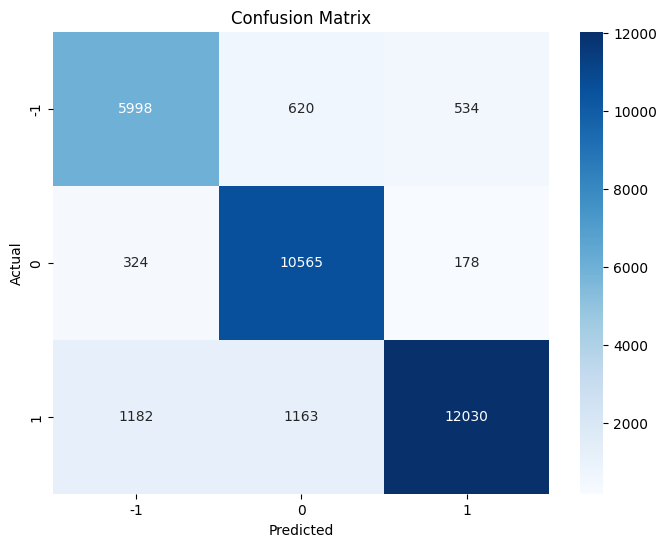


Sample Tweet: I really enjoyed the conference! The speakers were fantastic.
Predicted Sentiment: Positive


In [1]:
# Import required libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

'''
# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
'''

# Load dataset
df = pd.read_csv('Twitter_Data.csv')  # Update with your file path

# Handle missing values
df.dropna(inplace=True)

# Text preprocessing function
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove hashtag symbols (keep the text)
    tweet = re.sub(r'#', '', tweet)
    
    # Remove punctuation and special characters
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # Tokenization
    tokens = word_tokenize(tweet)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to tweets
df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet)

# Prepare features and labels
X = df['cleaned_tweet']
y = df['category']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# Initialize and train Logistic Regression model
model = LogisticRegression(
    class_weight='balanced',
    max_iter=100,
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Sample prediction
sample_tweet = "I really enjoyed the conference! The speakers were fantastic."
cleaned_sample = preprocess_tweet(sample_tweet)
sample_vector = tfidf.transform([cleaned_sample])
prediction = model.predict(sample_vector)[0]

sentiment_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
print(f"\nSample Tweet: {sample_tweet}")
print(f"Predicted Sentiment: {sentiment_map[prediction]}")